# Zestaw zadań: Kwadratury adaptacyjne
## Zadanie 1,2
### Autor: Artur Gęsiarz

In [223]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad_vec, trapz, simps
from scipy.special import roots_legendre

### Funkcja podcalkowa dla zadania 1

In [224]:
def f1(x):
    return 4 / (1 + x ** 2)

### Funkcje podcalkowe dla zadania 2

In [225]:
def f2(x):
    return np.where(x > 0, np.sqrt(x) * np.log(x), 0)

In [226]:
def f3(x, a = 0.001, b = 0.004):
    return 1 / ((x - 0.3) ** 2 + a) + 1 / ((x - 0.9) ** 2 + b) - 6

### Zakres tolerancji

In [227]:
tolerances = np.logspace(0, -14, num=15)

### Przedzial calkowania

In [228]:
a = 0
b = 1

### Prawdziwa wartosc calek

In [229]:
exact_value_f1 = np.pi
exact_value_f2 = - 4 / 9
exact_value_f3 = 1 / np.sqrt(0.001) * (np.arctan((1 - 0.3) / np.sqrt(0.001)) + np.arctan(0.3 / np.sqrt(0.001))) + 1 / np.sqrt(0.004) * (np.arctan((1 - 0.9) / np.sqrt(0.004)) + np.arctan(0.9 / np.sqrt(0.004))) - 6

### Inicalizacja tablicy bladu wzglednego

#### Funkcja podcalkowa pierwsza

In [230]:
errors_trap_f1 = []
errors_gauss_kronrod_f1 = []

errors_trap_not_adaptive_f1 = []
errors_mid_not_adaptive_f1 = []
errors_simp_not_adaptive_f1 = []
errors_gauss_not_adaptive_f1 = []

#### Funkcja podcalkowa druga

In [231]:
errors_trap_f2 = []
errors_gauss_kronrod_f2 = []

errors_trap_not_adaptive_f2 = []
errors_mid_not_adaptive_f2 = []
errors_simp_not_adaptive_f2 = []
errors_gauss_not_adaptive_f2 = []

#### Funkcja podcalkowa trzecia

In [232]:
errors_trap_f3 = []
errors_gauss_kronrod_f3 = []

errors_trap_not_adaptive_f3 = []
errors_mid_not_adaptive_f3 = []
errors_simp_not_adaptive_f3 = []
errors_gauss_not_adaptive_f3 = []

### Inicalizacja tablicy liczby ewaluacji w zaleznosci od metody oraz funkcji

#### Metody nie adaptacyjne

In [233]:
evals_not_adaptive = []

#### Funkcja podcalkowa pierwsza

In [234]:
evals_trap_f1 = []
evals_gauss_kronrod_f1 = []

#### Funkcja podcalkowa druga

In [235]:
evals_trap_f2 = []
evals_gauss_kronrod_f2 = []

#### Funkcja podcalkowa trzecia

In [236]:
evals_trap_f3 = []
evals_gauss_kronrod_f3 = []

### Funkcja obliczajaca calke metoda trapezow z podana toleraancja

In [237]:
def adaptive_trapezoidal_integration(f, a, b, tol):
    integral, err, info = quad_vec(f, a, b, epsabs=tol,quadrature='trapezoid', full_output=True)
    return integral, info.neval

### Funkcja obliczajca calke metoda Gaussa-Kronroda z podana tolerancja

In [238]:
def adaptive_gauss_kronrod_integration(f, a, b, tol):
    integral, err, info = quad_vec(f, a, b, epsabs=tol, full_output=True)
    return integral, info.neval

### Funkcja obliczajca calke metoda Gaussa-Legrande'a

In [239]:
def gauss_legendre_integration(n, f):
    nodes, weights = roots_legendre(n)

    x = 0.5 * (nodes + 1)
    w = 0.5 * weights

    integral_value = np.sum(w * f(x))

    return integral_value

### Funkcja pomocnicza obliczajaca blad wzgledny oraz liczbe ewaluacji funkcji dla metod adaptacyjnych

In [240]:
def calculate_errors_and_evals_for_adaptive(f, method, exact_value, a, b, erros, evals):

    for tol in tolerances:
        integrate, neval = method(f, a, b, tol)
        error = np.abs(np.abs(integrate - exact_value) / exact_value)

        erros.append(error)
        evals.append(neval)

    return erros, evals

### Funkcja pomocnicza obliczajca blad wzgledny oraz liczbe ewaluacji funkcji dla metod nieadaptacyjnych

In [241]:
def calculate_errors_and_evals_for_non_adaptive(f, x, m, exact_value):

    num_nodes = 2 ** m + 1

    ### Metoda nieadaptacyjna prostokatow
    dx = (1 - 0) / num_nodes
    x_mid = (x[:-1] + x[1:]) / 2
    integrate = np.sum(f(x_mid) * dx)
    error_mid = np.abs(np.abs(integrate - exact_value) / exact_value)

    ### Metoda nieadaptacyjna trapezow
    integrate = trapz(f(x), x)
    error_trap = np.abs(np.abs(integrate - exact_value) / exact_value)

    ### Metoda nieadaptacyjna Simpsona
    integrate = simps(f(x), x)
    error_simp = np.abs(np.abs(integrate - exact_value) / exact_value)

    ### Metoda nieadaptacyjna Gaussa-Lagrange'a
    integrate = gauss_legendre_integration(m, f)
    error_gauss = np.abs(np.abs(integrate - exact_value) / exact_value)

    return error_mid,error_trap, error_simp, error_gauss

### Obliczenie wartosci calki wszsytkich funkcji stosujac kwadratury adaptacyjne

In [242]:
### Metoda adaptacyjna trapezow

errors_trap_f1 ,evals_trap_f1 = calculate_errors_and_evals_for_adaptive(f1, adaptive_trapezoidal_integration, exact_value_f1, a, b, errors_trap_f1, evals_trap_f1)

errors_trap_f2 ,evals_trap_f2 = calculate_errors_and_evals_for_adaptive(f2, adaptive_trapezoidal_integration, exact_value_f2, a, b, errors_trap_f2, evals_trap_f2)

errors_trap_f3 ,evals_trap_f3 = calculate_errors_and_evals_for_adaptive(f3, adaptive_trapezoidal_integration, exact_value_f3, a, b, errors_trap_f3, evals_trap_f3)

### Metoda adaptacyjne Gausaa-Kronroda

errors_gauss_kronrod_f1,evals_gauss_kronrod_f1 = calculate_errors_and_evals_for_adaptive(f1, adaptive_gauss_kronrod_integration, exact_value_f1, a, b, errors_gauss_kronrod_f1, evals_gauss_kronrod_f1)

errors_gauss_kronrod_f2,evals_gauss_kronrod_f2 = calculate_errors_and_evals_for_adaptive(f2, adaptive_gauss_kronrod_integration, exact_value_f2, a, b, errors_gauss_kronrod_f2, evals_gauss_kronrod_f2)

errors_gauss_kronrod_f3,evals_gauss_kronrod_f3 = calculate_errors_and_evals_for_adaptive(f3, adaptive_gauss_kronrod_integration, exact_value_f3, a, b, errors_gauss_kronrod_f3, evals_gauss_kronrod_f3)

/var/folders/cw/20db57g90t309rc9w5fqkvjr0000gn/T/ipykernel_24661/2498157805.py:2: RuntimeWarning: divide by zero encountered in log
  return np.where(x > 0, np.sqrt(x) * np.log(x), 0)
/var/folders/cw/20db57g90t309rc9w5fqkvjr0000gn/T/ipykernel_24661/2498157805.py:2: RuntimeWarning: invalid value encountered in scalar multiply
  return np.where(x > 0, np.sqrt(x) * np.log(x), 0)


### Obliczenie wartosci wszystkich funkcji stosujac kwadratury nieadaptacyjne

In [243]:
for m in np.arange(1, 26):

    # Obliczenie liczby węzłów
    num_nodes = 2 ** m + 1
    evals_not_adaptive.append(num_nodes)

    # Rozmieszczenie równoodległych węzłów
    x = np.linspace(0, 1, num_nodes)

    # Obliczenie bledow dla kazdej funkcji podcalkowej
    error_mid_f1, error_trap_f1, error_simp_f1, error_gauss_f1 = calculate_errors_and_evals_for_non_adaptive(f1, x, m, exact_value_f1)
    error_mid_f2, error_trap_f2, error_simp_f2, error_gauss_f2 = calculate_errors_and_evals_for_non_adaptive(f2, x, m, exact_value_f2)
    error_mid_f3, error_trap_f3, error_simp_f3, error_gauss_f3 = calculate_errors_and_evals_for_non_adaptive(f3, x, m, exact_value_f3)

    # Dodanie do tablicy obliczonych wczesniej bledow
    errors_mid_not_adaptive_f1.append(error_mid_f1)
    errors_mid_not_adaptive_f2.append(error_mid_f2)
    errors_mid_not_adaptive_f3.append(error_mid_f3)

    errors_trap_not_adaptive_f1.append(error_trap_f1)
    errors_trap_not_adaptive_f2.append(error_trap_f2)
    errors_trap_not_adaptive_f3.append(error_trap_f3)

    errors_simp_not_adaptive_f1.append(error_simp_f1)
    errors_simp_not_adaptive_f2.append(error_simp_f2)
    errors_simp_not_adaptive_f3.append(error_simp_f3)

    errors_gauss_not_adaptive_f1.append(error_gauss_f1)
    errors_gauss_not_adaptive_f2.append(error_gauss_f2)
    errors_gauss_not_adaptive_f3.append(error_gauss_f3)

/var/folders/cw/20db57g90t309rc9w5fqkvjr0000gn/T/ipykernel_24661/4144280087.py:12: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  integrate = trapz(f(x), x)
/var/folders/cw/20db57g90t309rc9w5fqkvjr0000gn/T/ipykernel_24661/4144280087.py:16: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integrate = simps(f(x), x)
/var/folders/cw/20db57g90t309rc9w5fqkvjr0000gn/T/ipykernel_24661/2498157805.py:2: RuntimeWarning: divide by zero encountered in log
  return np.where(x > 0, np.sqrt(x) * np.log(x), 0)
/var/folders/cw/20db57g90t309rc9w5fqkvjr0000gn/T/ipykernel_24661/2498157805.py:2: RuntimeWarning: invalid value encountered in multiply
  return np.where(x > 0, np.sqrt(x) * np.log(x), 0)


### Rysowanie wykresu dla funkcji podcalkowej nr. 1

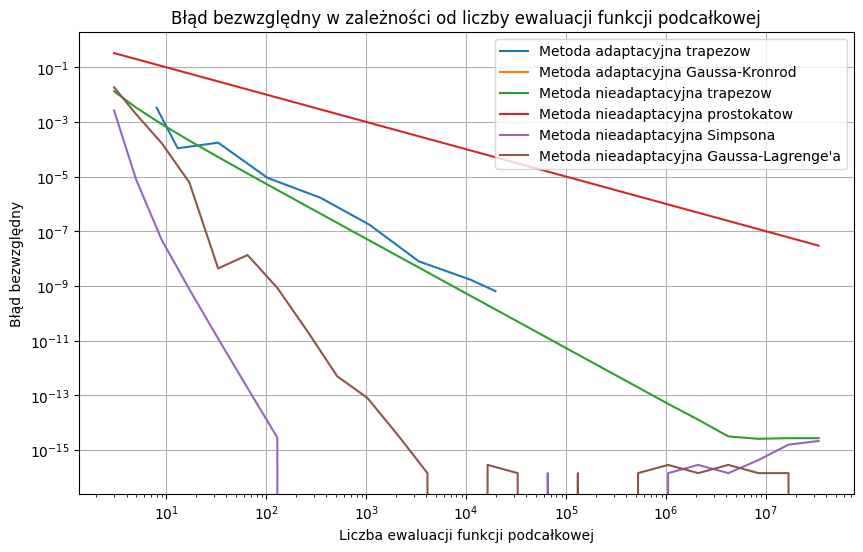

In [244]:
plt.figure(figsize=(10, 6))

plt.semilogy(evals_trap_f1, errors_trap_f1, label='Metoda adaptacyjna trapezow')
plt.semilogy(evals_gauss_kronrod_f1, errors_gauss_kronrod_f1, label='Metoda adaptacyjna Gaussa-Kronrod')

plt.semilogy(evals_not_adaptive, errors_trap_not_adaptive_f1, label='Metoda nieadaptacyjna trapezow')
plt.semilogy(evals_not_adaptive, errors_mid_not_adaptive_f1, label='Metoda nieadaptacyjna prostokatow')
plt.semilogy(evals_not_adaptive, errors_simp_not_adaptive_f1, label='Metoda nieadaptacyjna Simpsona')
plt.semilogy(evals_not_adaptive, errors_gauss_not_adaptive_f1, label='Metoda nieadaptacyjna Gaussa-Lagrenge\'a')

plt.title('Błąd bezwzględny w zależności od liczby ewaluacji funkcji podcałkowej')
plt.xlabel('Liczba ewaluacji funkcji podcałkowej')
plt.ylabel('Błąd bezwzględny')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

### Rysowanie wykresu dla funkcji podcalkowej nr. 2

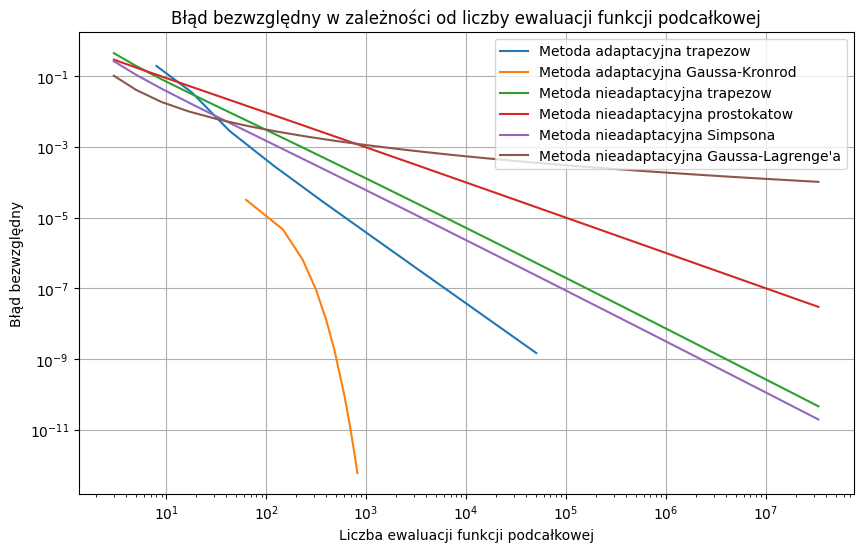

In [245]:
plt.figure(figsize=(10, 6))

plt.semilogy(evals_trap_f2, errors_trap_f2, label='Metoda adaptacyjna trapezow')
plt.semilogy(evals_gauss_kronrod_f2, errors_gauss_kronrod_f2, label='Metoda adaptacyjna Gaussa-Kronrod')

plt.semilogy(evals_not_adaptive, errors_trap_not_adaptive_f2, label='Metoda nieadaptacyjna trapezow')
plt.semilogy(evals_not_adaptive, errors_mid_not_adaptive_f2, label='Metoda nieadaptacyjna prostokatow')
plt.semilogy(evals_not_adaptive, errors_simp_not_adaptive_f2, label='Metoda nieadaptacyjna Simpsona')
plt.semilogy(evals_not_adaptive, errors_gauss_not_adaptive_f2, label='Metoda nieadaptacyjna Gaussa-Lagrenge\'a')

plt.title('Błąd bezwzględny w zależności od liczby ewaluacji funkcji podcałkowej')
plt.xlabel('Liczba ewaluacji funkcji podcałkowej')
plt.ylabel('Błąd bezwzględny')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

### Rysowanie wykresu dla funkcji podcalkowej nr. 3

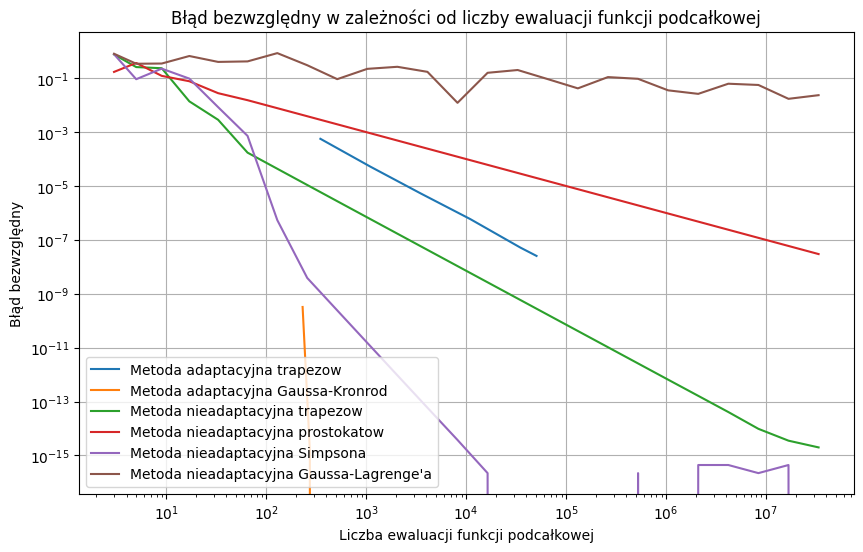

In [246]:
plt.figure(figsize=(10, 6))

plt.semilogy(evals_trap_f3, errors_trap_f3, label='Metoda adaptacyjna trapezow')
plt.semilogy(evals_gauss_kronrod_f3, errors_gauss_kronrod_f3, label='Metoda adaptacyjna Gaussa-Kronrod')

plt.semilogy(evals_not_adaptive, errors_trap_not_adaptive_f3, label='Metoda nieadaptacyjna trapezow')
plt.semilogy(evals_not_adaptive, errors_mid_not_adaptive_f3, label='Metoda nieadaptacyjna prostokatow')
plt.semilogy(evals_not_adaptive, errors_simp_not_adaptive_f3, label='Metoda nieadaptacyjna Simpsona')
plt.semilogy(evals_not_adaptive, errors_gauss_not_adaptive_f3, label='Metoda nieadaptacyjna Gaussa-Lagrenge\'a')

plt.title('Błąd bezwzględny w zależności od liczby ewaluacji funkcji podcałkowej')
plt.xlabel('Liczba ewaluacji funkcji podcałkowej')
plt.ylabel('Błąd bezwzględny')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()